# VGG-16 (Abhilasha's code)
## Preprocessing method: ImageDataGenerator()
## Image size: (98, 76) 
## Images: RGB
## Frozen pretrained layers
## Image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (98, 76)
batch_size = 128

train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.5)


train_generator = train_datagen.flow_from_directory(
    path_training,
    seed=10,
    target_size=(98,76),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True
)


validation_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset = 'training'
)

test_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset='validation'
)


Found 47009 images belonging to 2 classes.
Found 5825 images belonging to 2 classes.
Found 5824 images belonging to 2 classes.


In [10]:
# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
epochs=1000     # Set epochs

## Build the VGG model 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
##from tensorflow.keras.optimizers import RMSprop
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten, Dense
from keras.applications import VGG16


vgg=keras.applications.VGG16(include_top=False, pooling='avg', weights='imagenet',
input_shape=(98,76, 3))


# Freeze the layers except the last 5
for layer in vgg.layers[:-5]:
 layer.trainable = False # Check the trainable status of the individual layers
for layer in vgg.layers:
 print(layer, layer.trainable)

 # Create the model
model = Sequential() # Add the VGG16 convolutional base model
model.add(vgg)
 
# Add new layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='sigmoid'))

## Compile and Summary
model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='binary_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7fdf04728b80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf04728ee0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf04728bb0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fdf282d2c70> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf046be880> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf046c43d0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fdf04728d30> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf046ce7f0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf046d32b0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf046d36a0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fdf046d3610> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf046df2e0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fdf046e5640> False
<keras.layers.convolut

In [11]:
hist =  model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=5,
                           epochs=epochs,
                           callbacks=[callback])        

<ipython-input-11-24a7da8295b3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist =  model.fit_generator(generator=train_generator,


Epoch 1/1000
5/5 [==============================] - 9s 2s/step - loss: 0.7714 - accuracy: 0.5297 - val_loss: 0.7695 - val_accuracy: 0.5015
Epoch 2/1000
5/5 [==============================] - 8s 2s/step - loss: 0.6694 - accuracy: 0.6266 - val_loss: 0.7512 - val_accuracy: 0.5015
Epoch 3/1000
5/5 [==============================] - 8s 2s/step - loss: 0.6056 - accuracy: 0.7047 - val_loss: 0.7369 - val_accuracy: 0.5015
Epoch 4/1000
5/5 [==============================] - 8s 2s/step - loss: 0.5307 - accuracy: 0.7672 - val_loss: 0.7227 - val_accuracy: 0.5015
Epoch 5/1000
5/5 [==============================] - 8s 2s/step - loss: 0.5117 - accuracy: 0.7797 - val_loss: 0.7126 - val_accuracy: 0.5020
Epoch 6/1000
5/5 [==============================] - 8s 2s/step - loss: 0.4704 - accuracy: 0.8109 - val_loss: 0.7003 - val_accuracy: 0.5025
Epoch 7/1000
5/5 [==============================] - 8s 2s/step - loss: 0.4864 - accuracy: 0.7891 - val_loss: 0.6886 - val_accuracy: 0.5035
Epoch 8/1000
5/5 [=========

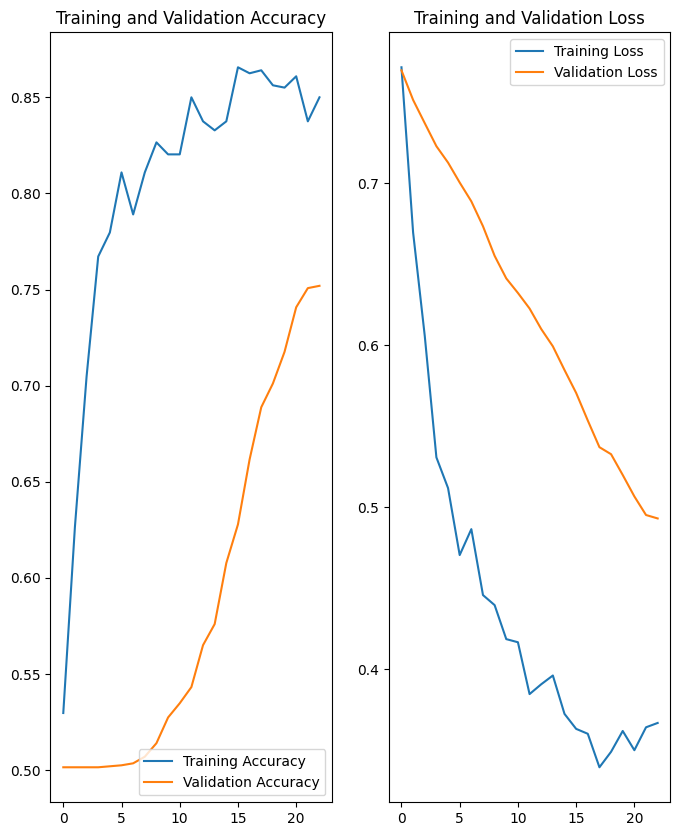

In [12]:
acc= hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(0, 23)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
model.save('GC weights/abhilasha')
model.save_weights('GC weights/abhilasha/vgg16_abhilasha_1.h5')

INFO:tensorflow:Assets written to: GC weights/abhilasha/assets


INFO:tensorflow:Assets written to: GC weights/abhilasha/assets
